In [14]:
"""
@author: 20PW14 S N Karthickpranav
"""

'\n@author: 20PW14 S N Karthickpranav\n'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, roc_curve

In [2]:
# Loading the WBC(Original) dataset
bc = pd.read_csv("WBCO.csv") # Class: (2 for benign, 4 for malignant)

# Preprocessing to remove the "?"
bc = bc.replace("?", np.nan)
bc = bc.dropna()

# Remove the unnecessary "id" feature
bc = bc.drop(["id"], axis=1)

# Getting X, y and printing their shapes
X = bc.drop(["class"], axis=1)
y= bc["class"]
print(X.shape, y.shape)

(683, 9) (683,)


In [3]:
# Splitting the dataset into train, test and printing their shapes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train test shape: ",X_train.shape, y_train.shape, "\nTest set shape: ", X_test.shape, y_test.shape)

Train test shape:  (546, 9) (546,) 
Test set shape:  (137, 9) (137,)


In [4]:
# Create the models
lrc = LogisticRegression()
svcRBF = SVC(kernel='rbf')
svcLINEAR = SVC(kernel='linear')
svcPOLY = SVC(kernel='poly')
svcSIGMOID = SVC(kernel='sigmoid')

# Train the models
lrc.fit(X_train, y_train)
svcRBF.fit(X_train, y_train)
svcLINEAR.fit(X_train, y_train)
svcPOLY.fit(X_train, y_train)
svcSIGMOID.fit(X_train, y_train)

# Predict the testset
y_pred_lrc = lrc.predict(X_test)
y_pred_svcRBF = svcRBF.predict(X_test)
y_pred_svcLINEAR = svcLINEAR.predict(X_test)
y_pred_svcPOLY = svcPOLY.predict(X_test)
y_pred_svcSIGMOID = svcSIGMOID.predict(X_test)

# Accuracy scores of all the models for initial comparison
print("Accuracy score of the LogisticRegresion model is: ", accuracy_score(y_test, y_pred_lrc))
print("Accuracy score of the SupportVectorClassifier with RBF kernel model is: ", accuracy_score(y_test, y_pred_svcRBF))
print("Accuracy score of the SupportVectorClassifier with LINEAR kernel model is: ", accuracy_score(y_test, y_pred_svcLINEAR))
print("Accuracy score of the SupportVectorClassifier with POLY kernel model is: ", accuracy_score(y_test, y_pred_svcPOLY))
print("Accuracy score of the SupportVectorClassifier with SIGMOID kernel model is: ", accuracy_score(y_test, y_pred_svcSIGMOID))

Accuracy score of the LogisticRegresion model is:  1.0
Accuracy score of the SupportVectorClassifier with RBF kernel model is:  0.9927007299270073
Accuracy score of the SupportVectorClassifier with LINEAR kernel model is:  1.0
Accuracy score of the SupportVectorClassifier with POLY kernel model is:  0.9708029197080292
Accuracy score of the SupportVectorClassifier with SIGMOID kernel model is:  0.41605839416058393


#### We can rank the models based on their accuracies in the order:
1. LogisticRegression or SVC-Linear 
2. SVC-RBF
3. SVC-POLY 
4. SVC-SIGMOID

#### It is also apparent that the sigmoid kernel does a terrible job in this case, given that it not even half as accurate as the others used.

### From the models used here, we can either choose LogisticRegression or SVC with a linear kernel for this problem.

In [5]:
# Best features of the dataset from X and y
bestFeatures = SelectKBest(score_func=chi2, k=5)
fit = bestFeatures.fit(X, y)
bcScores = pd.DataFrame(fit.scores_)
bcColumns = pd.DataFrame(X.columns)

featureScores = pd.concat([bcColumns, bcScores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(5, 'Score'))

                 Feature        Score
5             bareNuclei  1729.066174
1   uniformityOfCellSize  1370.064587
2  uniformityOfCellShape  1279.767704
7         normalNucleoli  1143.866712
3       marginalAdhesion   986.417879


#### From the chi2 function, we can see that bareNuclei is the best feature, while cell shape and size are almost of similar importance.

In [8]:
# Other metrics
print("FOR LR model: ")
print("Accuracy score: ", accuracy_score(y_test,y_pred_lrc))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_lrc))
print("Classification Report: ", classification_report(y_test, y_pred_lrc))
print("ROC_score: ", roc_curve(LabelEncoder().fit_transform(y_test), LabelEncoder().fit_transform(y_pred_lrc)))
print("AUC_score: ", roc_auc_score(y_test, y_pred_lrc))

FOR LR model: 
Accuracy score:  1.0
Confusion Matrix:  [[93  0]
 [ 0 44]]
Classification Report:                precision    recall  f1-score   support

           2       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        44

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

ROC_score:  (array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))
AUC_score:  1.0


In [9]:
# Other metrics
print("FOR SVC RBF model: ")
print("Accuracy score: ", accuracy_score(y_test,y_pred_svcRBF))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_svcRBF))
print("Classification Report: ", classification_report(y_test, y_pred_svcRBF))
print("ROC_score: ", roc_curve(LabelEncoder().fit_transform(y_test), LabelEncoder().fit_transform(y_pred_svcRBF)))
print("AUC_score: ", roc_auc_score(y_test, y_pred_svcRBF))

FOR SVC RBF model: 
Accuracy score:  0.9927007299270073
Confusion Matrix:  [[92  1]
 [ 0 44]]
Classification Report:                precision    recall  f1-score   support

           2       1.00      0.99      0.99        93
           4       0.98      1.00      0.99        44

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

ROC_score:  (array([0.        , 0.01075269, 1.        ]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))
AUC_score:  0.9946236559139785


In [10]:
# Other metrics
print("FOR SVC LINEAR model: ")
print("Accuracy score: ", accuracy_score(y_test,y_pred_svcLINEAR))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_svcLINEAR))
print("Classification Report: ", classification_report(y_test, y_pred_svcLINEAR))
print("ROC_score: ", roc_curve(LabelEncoder().fit_transform(y_test), LabelEncoder().fit_transform(y_pred_svcLINEAR)))
print("AUC_score: ", roc_auc_score(y_test, y_pred_svcLINEAR))

FOR SVC LINEAR model: 
Accuracy score:  1.0
Confusion Matrix:  [[93  0]
 [ 0 44]]
Classification Report:                precision    recall  f1-score   support

           2       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        44

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

ROC_score:  (array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))
AUC_score:  1.0


In [11]:
# Other metrics
print("FOR SVC POLY model: ")
print("Accuracy score: ", accuracy_score(y_test,y_pred_svcPOLY))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_svcPOLY))
print("Classification Report: ", classification_report(y_test, y_pred_svcPOLY))
print("ROC_score: ", roc_curve(LabelEncoder().fit_transform(y_test), LabelEncoder().fit_transform(y_pred_svcPOLY)))
print("AUC_score: ", roc_auc_score(y_test, y_pred_svcPOLY))

FOR SVC POLY model: 
Accuracy score:  0.9708029197080292
Confusion Matrix:  [[93  0]
 [ 4 40]]
Classification Report:                precision    recall  f1-score   support

           2       0.96      1.00      0.98        93
           4       1.00      0.91      0.95        44

    accuracy                           0.97       137
   macro avg       0.98      0.95      0.97       137
weighted avg       0.97      0.97      0.97       137

ROC_score:  (array([0., 0., 1.]), array([0.        , 0.90909091, 1.        ]), array([2, 1, 0], dtype=int64))
AUC_score:  0.9545454545454546


In [12]:
# Other metrics
print("FOR SVC SIGMOID model: ")
print("Accuracy score: ", accuracy_score(y_test,y_pred_svcSIGMOID))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_svcSIGMOID))
print("Classification Report: ", classification_report(y_test, y_pred_svcSIGMOID))
print("ROC_score: ", roc_curve(LabelEncoder().fit_transform(y_test), LabelEncoder().fit_transform(y_pred_svcSIGMOID)))
print("AUC_score: ", roc_auc_score(y_test, y_pred_svcSIGMOID))

FOR SVC SIGMOID model: 
Accuracy score:  0.41605839416058393
Confusion Matrix:  [[57 36]
 [44  0]]
Classification Report:                precision    recall  f1-score   support

           2       0.56      0.61      0.59        93
           4       0.00      0.00      0.00        44

    accuracy                           0.42       137
   macro avg       0.28      0.31      0.29       137
weighted avg       0.38      0.42      0.40       137

ROC_score:  (array([0.        , 0.38709677, 1.        ]), array([0., 0., 1.]), array([2, 1, 0], dtype=int64))
AUC_score:  0.3064516129032258


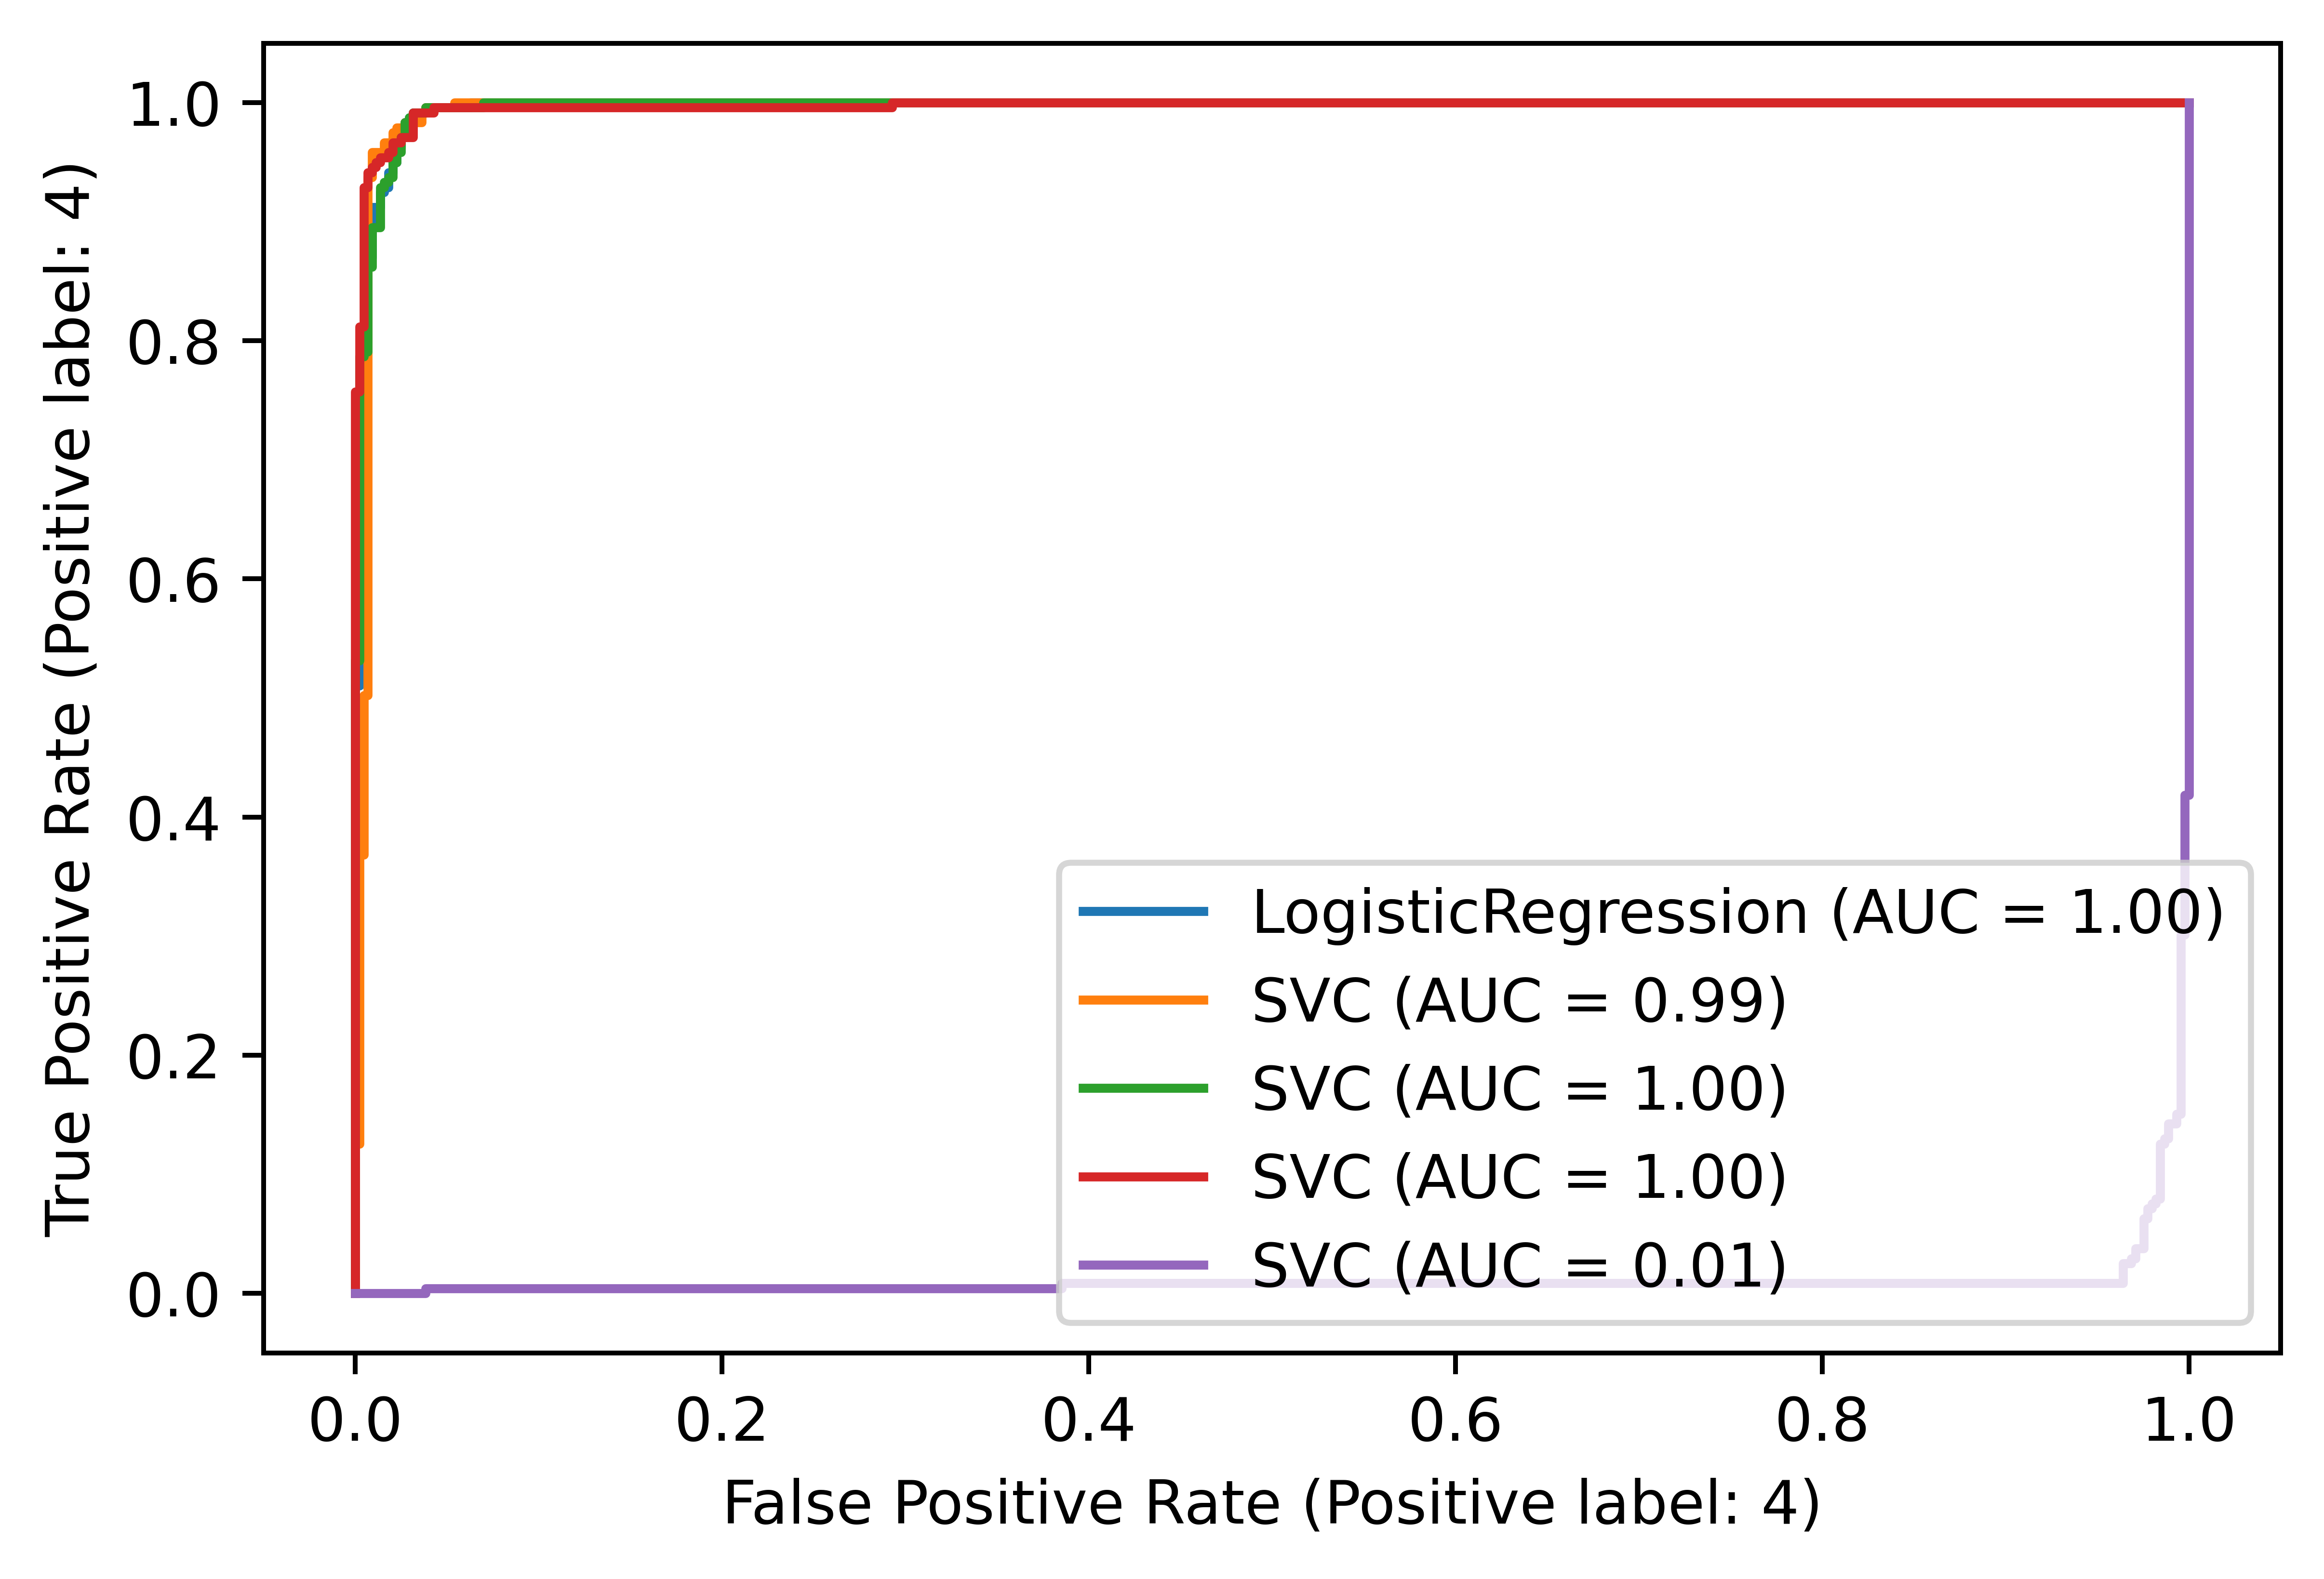

In [13]:
# Plotting the ROC curves for all the models
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=900)
plot_roc_curve(lrc, X, y, ax=axes)
plot_roc_curve(svcRBF, X, y, ax=axes)
plot_roc_curve(svcLINEAR, X, y, ax=axes)
plot_roc_curve(svcPOLY, X, y, ax=axes)
plot_roc_curve(svcSIGMOID, X, y, ax=axes)